In [1]:
import pandas as pd
import numpy as np

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Normalized Data

filepath = "./GEO Samples/all_data_train_data_stage_classification.csv"
train_data = pd.read_csv(filepath)
X_train = train_data.drop(['Stage'], axis=1)
y_train = train_data[['Stage']]

filepath = "./GEO Samples/all_data_test_data_stage_classification.csv.csv"
test_data = pd.read_csv(filepath)
X_test = test_data.drop(['Stage'], axis=1)
y_test = test_data[['Stage']]

In [17]:
features_count = X_train.shape[1]
features_count

2550

In [24]:
y_train[10:20]

,Stage
10,3
11,3
12,1
13,4
14,1
15,3
16,3
17,4
18,1
19,4


In [25]:
# Divide labels into 2 classes: Early stages( 1&2)  and late stages (3 & 4) 

# Replace values in the column directly
y_train.loc[:, "Stage"] = y_train["Stage"].replace({1: 0, 2: 0, 3: 1, 4: 1})
y_test.loc[:, "Stage"] = y_test["Stage"].replace({1: 0, 2: 0, 3: 1, 4: 1})


y_train[10:20]

,Stage
10,1
11,1
12,0
13,1
14,0
15,1
16,1
17,1
18,0
19,1


In [27]:
y_train['Stage'].value_counts()


Stage
1    530
0    530
Name: count, dtype: int64

## Plot 2D PCA

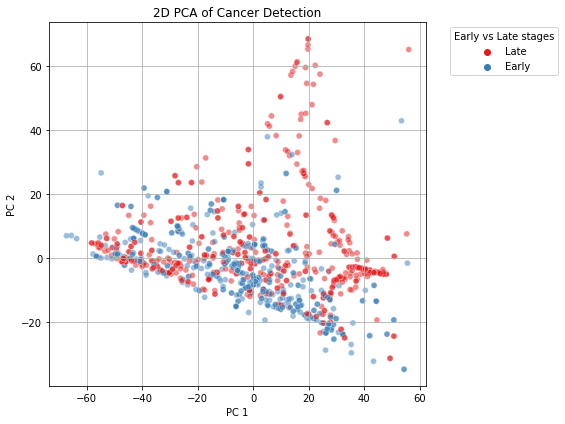

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Reduce to 2 principal components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train)

df_pca = pd.DataFrame(x_pca, columns=["PC1", "PC2"])
df_pca["Stage"] = y_train["Stage"].values


# remove outliers!
df = df_pca
s0 = df_pca[df_pca["PC1"] > 60]
df = df.drop( s0.index.tolist())


# Plot PCA
df["Stage_Label"] = df["Stage"].map({0: "Early", 1: "Late"})

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data = df,
    x="PC1", y="PC2",
    hue="Stage_Label",
    palette="Set1",
    alpha=0.5          
)
plt.legend(title="Early vs Late stages", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("2D PCA of Cancer Detection")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()

## sklearn Model

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the XGBoost model
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print("XGBClassifier\n--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


XGBClassifier
--------------------------
Accuracy: 0.9
Confusion Matrix:
 [[62  5]
 [ 9 64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        67
           1       0.93      0.88      0.90        73

    accuracy                           0.90       140
   macro avg       0.90      0.90      0.90       140
weighted avg       0.90      0.90      0.90       140



MLPClassifier(hidden_layer_sizes=(10, 200, 256, 10, 2), max_iter=1000,
              random_state=19)

---------------------------
MLP Classifier on Train Data
--------------------------
Accuracy: 0.9990566037735849
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       530
           1       1.00      1.00      1.00       530

    accuracy                           1.00      1060
   macro avg       1.00      1.00      1.00      1060
weighted avg       1.00      1.00      1.00      1060



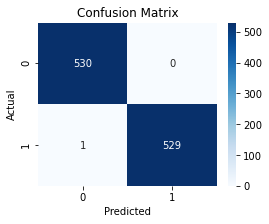

--------------------------
MLP Classifier
--------------------------
Accuracy: 0.8928571428571429
Confusion Matrix:
 [[61  6]
 [ 9 64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        67
           1       0.91      0.88      0.90        73

    accuracy                           0.89       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140



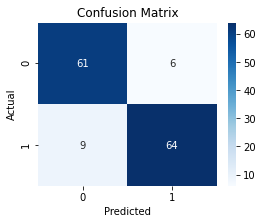

In [53]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(
    hidden_layer_sizes=(10,200,256,10,2),
    activation='relu',
    solver='adam',
    max_iter=1000,
    learning_rate_init=0.001,
    random_state=19
)

print(MLP_model.fit(X_train, y_train["Stage"]))

# ======================
# Predict on tain set
# ======================
y_pred = MLP_model.predict(X_train)

# Evaluate performance
cm = confusion_matrix(y_train, y_pred)

print("\n---------------------------")
print("MLP Classifier on Train Data\n--------------------------")
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Classification Report:\n", classification_report(y_train, y_pred))

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




# ======================
# Predict on test set
# ======================
y_pred = MLP_model.predict(X_test)

# Evaluate performance
cm = confusion_matrix(y_test, y_pred)

print("--------------------------\nMLP Classifier\n--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import torch
import torch.nn as nn
epochs = 1000

model = nn.Sequential(
    nn.Linear(764, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 10),
    nn.Sigmoid()
)

loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(output, label)


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for n in range(epochs):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(model)
